# Introduction

In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. ([wikipedia](https://en.wikipedia.org/wiki/Loan))

### **The major aim of this notebook is to predict which of the customers will have their loan approved.**

![](https://i.pinimg.com/originals/41/b0/08/41b008395e8e7f888666688915750d1f.gif)

# Data Id 📋

This dataset is named [Loan Prediction Dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset) data set. The dataset contains a set of **613** records under **13 attributes**:

![](http://miro.medium.com/max/795/1*cAd_tqzgCWtCVMjEasWmpQ.png)

## The main objective for this dataset:
Using machine learning techniques to predict loan payments.

### target value: `Loan_Status`

# Libraries 📕📗📘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("LoanData.csv")
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [6]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [9]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [11]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection & Handling

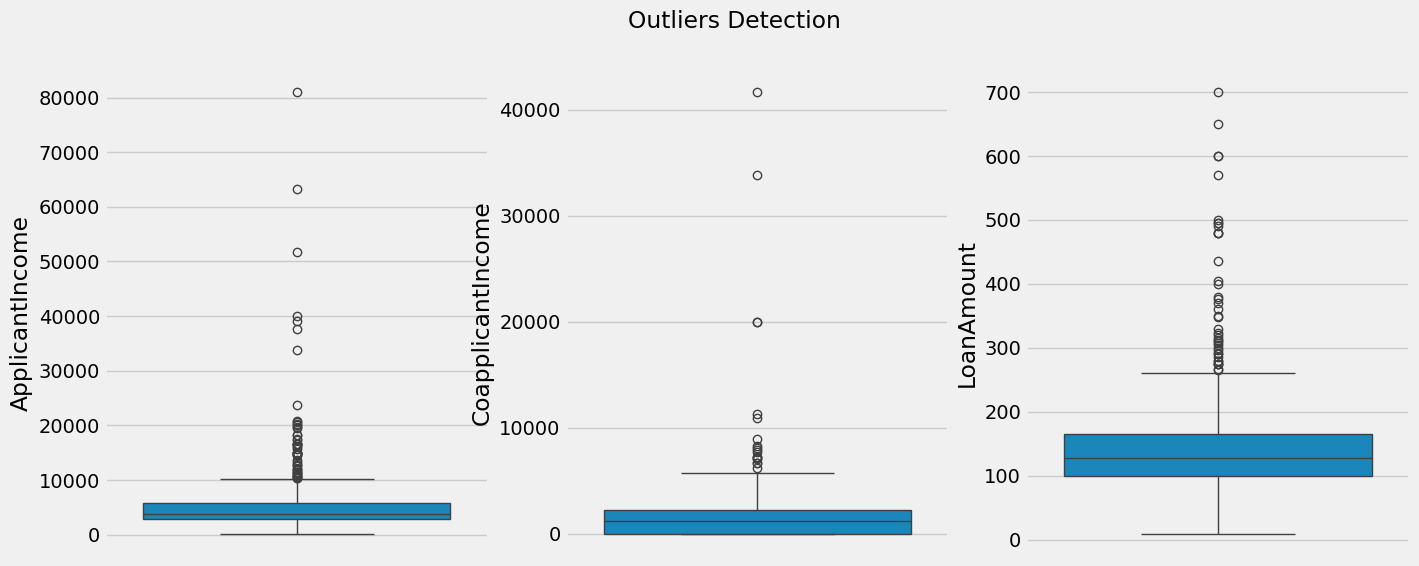

In [12]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 6)

plt.subplot(1, 3, 1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1, 3, 2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1, 3, 3)
sns.boxplot(data['LoanAmount'])

plt.suptitle("Outliers Detection")
plt.show()

In [13]:
print("Before Removing the outliers", data.shape)

data = data[data['ApplicantIncome']<25000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (614, 13)
After Removing the outliers (607, 13)


In [14]:
print("Before Removing the outliers", data.shape)

data = data[data['CoapplicantIncome']<12000]

print("After Removing the outliers", data.shape)

Before Removing the outliers (607, 13)
After Removing the outliers (603, 13)


In [15]:
print("Before Removing the outliers", data.shape)

data = data[data['LoanAmount']<400]

print("After Removing the outliers", data.shape)

Before Removing the outliers (603, 13)
After Removing the outliers (591, 13)


# Analysis

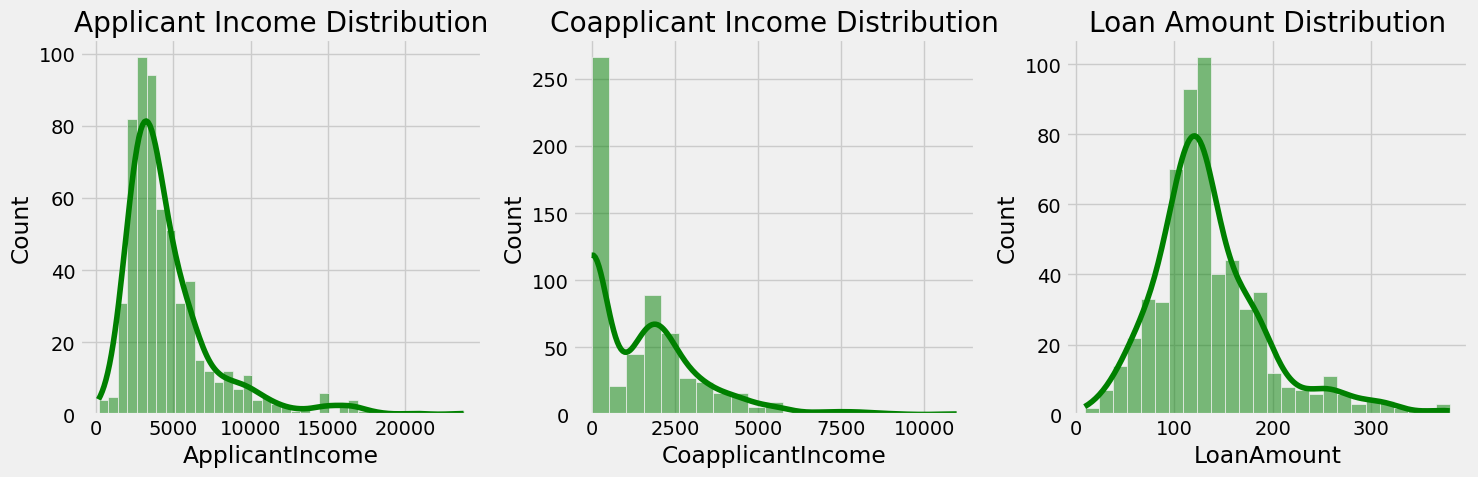

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the figure size
plt.figure(figsize=(15, 5))

# Plot ApplicantIncome distribution
plt.subplot(1, 3, 1)
sns.histplot(data['ApplicantIncome'], color='green', kde=True)
plt.title('Applicant Income Distribution')

# Plot CoapplicantIncome distribution
plt.subplot(1, 3, 2)
sns.histplot(data['CoapplicantIncome'], color='green', kde=True)
plt.title('Coapplicant Income Distribution')

# Plot LoanAmount distribution
plt.subplot(1, 3, 3)
sns.histplot(data['LoanAmount'], color='green', kde=True)
plt.title('Loan Amount Distribution')

# Display the plots
plt.tight_layout()
plt.show()

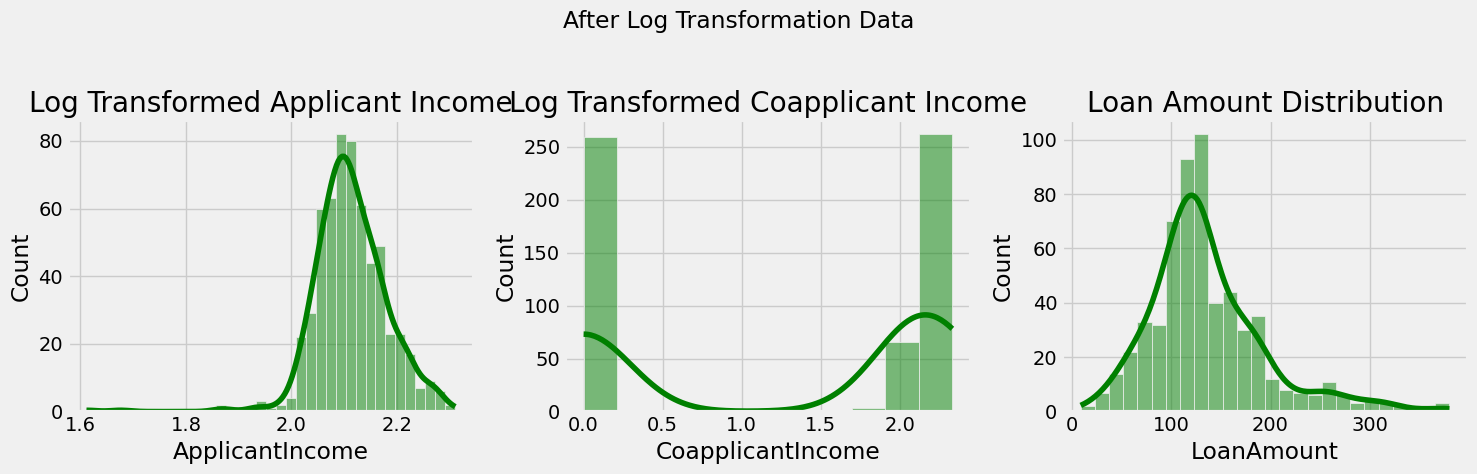

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Applying log transformation
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

# Adjust the figure size
plt.figure(figsize=(15, 5))

# Plot ApplicantIncome distribution after log transformation
plt.subplot(1, 3, 1)
sns.histplot(data['ApplicantIncome'], color='green', kde=True)
plt.title('Log Transformed Applicant Income')

# Plot CoapplicantIncome distribution after log transformation
plt.subplot(1, 3, 2)
sns.histplot(data['CoapplicantIncome'], color='green', kde=True)
plt.title('Log Transformed Coapplicant Income')

# Plot LoanAmount distribution after log transformation
plt.subplot(1, 3, 3)
sns.histplot(data['LoanAmount'], color='green', kde=True)
plt.title('Loan Amount Distribution')

# Add a main title
plt.suptitle("After Log Transformation Data")

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [20]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [21]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [22]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

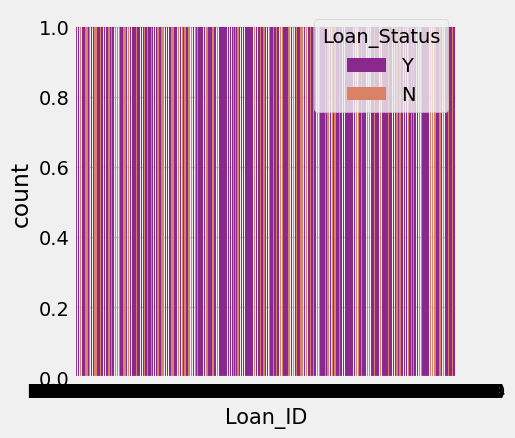

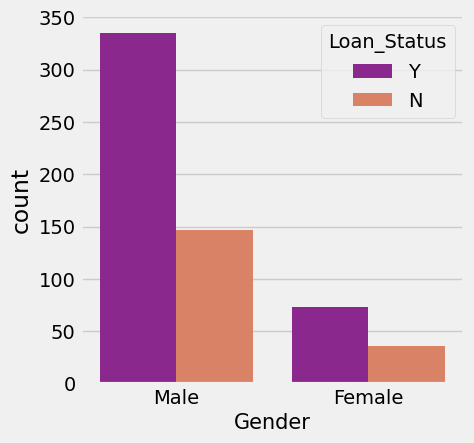

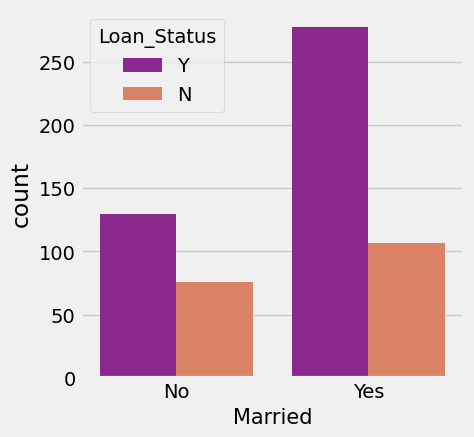

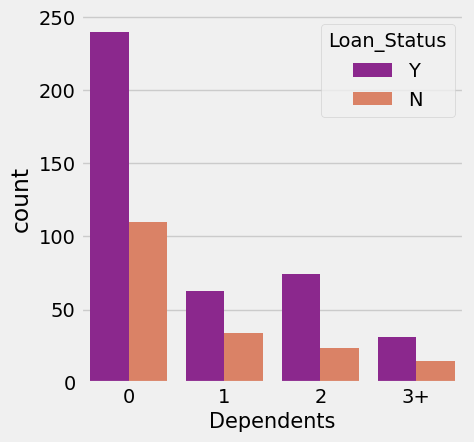

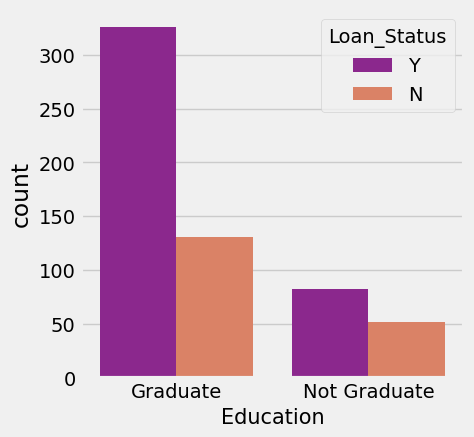

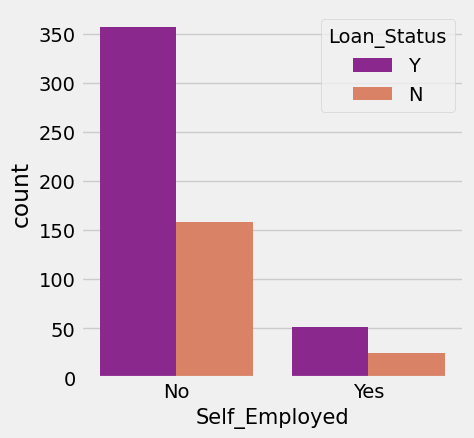

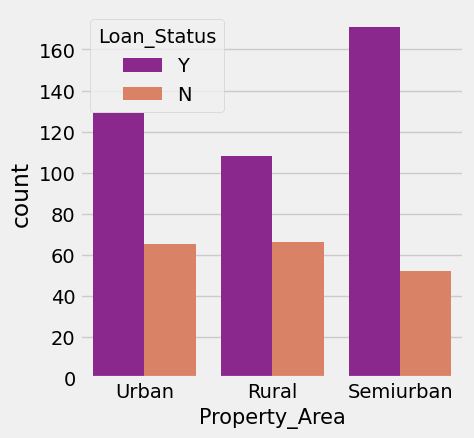

In [23]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot(x =i, hue = 'Loan_Status', data = data, palette = 'plasma' )
    plt.xlabel(i, fontsize = 15)

In [24]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
# Plt Categporial with Target Data

print(pd.crosstab(data['Loan_Status'], data['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [26]:
print(pd.crosstab(data['Loan_Status'], data['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [27]:
print(pd.crosstab(data['Loan_Status'], data['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [28]:
# Plt Categporial with Target Data

print(pd.crosstab(data['Loan_Status'], data['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [29]:
# Data Prepration

In [30]:
data.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [31]:
data = data.drop(['Loan_ID'], axis = 1)

In [32]:
data.select_dtypes('object').head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [34]:
# Replace categorical values with numerical values and explicitly set the data type
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0}).astype(int)
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0}).astype(int)
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0}).astype(int)


In [35]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,No,2.160333,0.000000,128.0,360.0,1.0,Urban,Y
1,1,1,1,1,No,2.131810,2.118566,128.0,360.0,1.0,Rural,N
2,1,1,0,1,Yes,2.080237,0.000000,66.0,360.0,1.0,Urban,Y
3,1,1,0,0,No,2.061368,2.170880,120.0,360.0,1.0,Urban,Y
4,1,0,0,1,No,2.163267,0.000000,141.0,360.0,1.0,Urban,Y


In [36]:
data['Dependents'].value_counts()

Dependents
0     350
2      98
1      97
3+     46
Name: count, dtype: int64

In [38]:
# Replace categorical values with numerical values and explicitly set the data type
data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No': 0}).astype(int)
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0}).astype(int)
data['Property_Area'] = data['Property_Area'].replace({'Urban': 1, 'Semiurban': 1, 'Rural': 0}).astype(int)
data['Dependents'] = data['Dependents'].replace({'0': 0, '1': 1, '2': 1, '3+': 1}).astype(int)


In [39]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,2.160333,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,2.131810,2.118566,128.0,360.0,1.0,0,0
2,1,1,0,1,1,2.080237,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2.061368,2.170880,120.0,360.0,1.0,1,1
4,1,0,0,1,0,2.163267,0.000000,141.0,360.0,1.0,1,1


In [40]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [41]:
x.shape

(591, 11)

In [42]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [43]:
y.shape

(591,)

In [44]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 591, dtype: int64

# Handle Imbalance data

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
x_rasmple, y_rasmple = SMOTE().fit_resample(x, y.values.ravel())

In [47]:
print(x_rasmple.shape)
print(y_rasmple.shape)

(816, 11)
(816,)


In [48]:
y.shape

(591,)

# Train test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train,y_test = train_test_split(x_rasmple, y_rasmple, test_size = 0.2, random_state = 0)

In [51]:
x_train.shape

(652, 11)

In [52]:
y_test.shape

(164,)

# Model Building

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
from sklearn.metrics import accuracy_score

In [67]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
y_pred = model.predict(x_test)

In [69]:
print("Traning Accuracy", model.score(x_train, y_train))
print("Test Accuracy", model.score(x_test, y_test))

Traning Accuracy 0.7730061349693251
Test Accuracy 0.7865853658536586


In [70]:
from sklearn.metrics import classification_report

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        82
           1       0.74      0.88      0.80        82

    accuracy                           0.79       164
   macro avg       0.80      0.79      0.78       164
weighted avg       0.80      0.79      0.78       164



In [72]:
print("Our Model Accuracy is",accuracy_score(y_pred, y_test) )

Our Model Accuracy is 0.7865853658536586


In [73]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,2.160333,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,2.131810,2.118566,128.0,360.0,1.0,0,0
2,1,1,0,1,1,2.080237,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2.061368,2.170880,120.0,360.0,1.0,1,1
4,1,0,0,1,0,2.163267,0.000000,141.0,360.0,1.0,1,1


In [75]:
model_pred = np.array([[1,1,1, 1, 1,3924, 1733, 148.0, 360, 1, 1 ]])

In [76]:
prediction = LR.predict(model_pred)
print(prediction[0])

0


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [77]:
import pickle

# Assuming `model` is your trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
